In [237]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [238]:
# Importing the raw CSV file
df=pd.read_csv("./raw_practo.csv")

In [239]:
# reviewing the dataframe
df

,Name,Speciality,Degree,Year_of_experience,Location,City,dp_score,npv,consultation_fee
0,Ms. Priyanka Wincy R,Dietitian/Nutritionist,B.Sc.,4 Years Experience Overall,"Koramangala 7 Block, Bangalore",Bangalore,100%,(40 votes),₹ 600 fee
1,Ms. Neha Ranglani,Dietitian/Nutritionist,B.Sc.,14 Years Experience Overall (13 years as spec...,"Bandra West, Mumbai",Mumbai,96%,(222 votes),₹ 2500 fee
2,Ms. Sonal Bhosale,Dietitian/Nutritionist,B.Sc.,16 Years Experience Overall (10 years as spec...,"Kandivali West, Mumbai",Mumbai,99%,(96 votes),₹ 0 fee
3,Ms. Silky Mahajan,Dietitian/Nutritionist,B.Sc.,15 Years Experience Overall,"Koramangala 3 Block, Bangalore",Bangalore,97%,(270 votes),₹ 1770 fee
4,Ms. Twincy Ann Sunil,Dietitian/Nutritionist,B.Sc.,1 Year Experience Overall,"Koramangala 5 Block, Bangalore",Bangalore,99%,(121 votes),₹ 600 fee
...,...,...,...,...,...,...,...,...,...
5996,Ms. Swarn Shikha Sharma,Dietitian/Nutritionist,Post Graduation Diploma in Dietetics,17 Years Experience Overall (16 years as spec...,"Greater Kailash Part 1, Delhi",Delhi,97%,(34 votes),₹ 300 fee
5997,Ms. Meghna Parekh Sheth,Dietitian/Nutritionist,Post Graduation Diploma in Dietetics,26 Years Experience Overall (24 years as spec...,"Kandivali West, Mumbai",Mumbai,96%,(168 votes),₹ 500 fee
5998,Ms. Shweta Uchil,Dietitian/Nutritionist,Post Graduation Diploma in Dietetics,24 Years Experience Overall (22 years as spec...,"Kandivali West, Mumbai",Mumbai,93%,(15 votes),₹ 0 fee
5999,Ms. Pallavi Larecha,Dietitian/Nutritionist,Post Graduation Diploma in Dietetics and Publi...,13 Years Experience Overall (12 years as spec...,"Shalimar Bagh, Delhi",Delhi,92%,(37 votes),₹ 450 fee


### Cleaning

In [240]:
# return the shape of the DataFrame
df.shape

(6001, 9)

In [241]:
# count the number of duplicated rows
df.duplicated().sum()

6

In [242]:
# remove duplicate rows
df.drop_duplicates(inplace=True)

In [243]:
# display the count of missing values in each column
df.isna().sum()

Name                  0
Speciality            0
Degree                0
Year_of_experience    0
Location              0
City                  0
dp_score              0
npv                   0
consultation_fee      0
dtype: int64

In [244]:
# splitting the 'Location' column by commas, creating two new columns 'Location' and 'Location-1
df[['Location', 'Location-1']] = df['Location'].str.split(',', expand=True)

In [245]:
# dropping the Location-1 containing city name
df.drop('Location-1',axis=1,inplace=True)

In [246]:
# clean and convert the 'dp_score' column to integers by removing non-numeric characters
df['dp_score']=df['dp_score'].str.replace("[^0-9]",'',regex=True).astype(int)

In [247]:
# convert the 'npv' column to integers by removing non-numeric characters
df['npv']=df['npv'].str.replace("[^0-9]",'',regex=True).astype(int)

In [248]:
# convert the 'consultation_fee' column to integers by removing non-numeric characters
df['consultation_fee']=df['consultation_fee'].str.replace("[^0-9]",'',regex=True).astype(int)

In [249]:
# getting only numerical values from 'Year_of_experience' column
df['Year_of_experience']=df['Year_of_experience'].str.replace('[^0-9]',' ',regex=True).str.strip().str.split(expand=True)[0]

In [250]:
# remove noise from the 'Year_of_experience' column
df['Year_of_experience'].replace('.None','',inplace=True)

In [251]:
df.Year_of_experience.unique()

array(['4', '14', '16', '15', '1', '23', '27', '22', '19', '33', '17',
       '31', '30', '25', '13', '18', '24', '28', '21', '11', '20', '9',
       '12', '8', '7', '44', '34', '10', '5', '6', '2', '26', '29', '32',
       '3', '36', '40', '46', '43', '39', '42', '50', '35', '38', '51',
       '45', '47', '41', '37', '58', '54', '48', '52', '61', '49', '53',
       '64', '57', '56', '59', None], dtype=object)

In [252]:
# checking for nulls
df['Year_of_experience'].isna().sum()

2

In [253]:
# dropping nulls
df=df.dropna()

In [254]:
# convert the 'Year_of_experience' column to integers
df['Year_of_experience']=df['Year_of_experience'].astype(int)

/var/folders/18/4mcy45057dsgrqgdvymcp9540000gn/T/ipykernel_48944/1725475451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_of_experience']=df['Year_of_experience'].astype(int)


In [255]:
# display the data types of each column in the DataFrame
df.dtypes

Name                  object
Speciality            object
Degree                object
Year_of_experience     int64
Location              object
City                  object
dp_score               int64
npv                    int64
consultation_fee       int64
dtype: object

In [256]:
# create a new column 'npv(votes)' and assign the values from the 'npv' column
df['npv(votes)']=df['npv']

/var/folders/18/4mcy45057dsgrqgdvymcp9540000gn/T/ipykernel_48944/1518885625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['npv(votes)']=df['npv']


In [257]:
# remove the 'npv' column
df.drop('npv',axis=1,inplace=True)

/var/folders/18/4mcy45057dsgrqgdvymcp9540000gn/T/ipykernel_48944/3724161561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('npv',axis=1,inplace=True)


In [258]:
# display the first 2 rows 
df.head(2)

,Name,Speciality,Degree,Year_of_experience,Location,City,dp_score,consultation_fee,npv(votes)
0,Ms. Priyanka Wincy R,Dietitian/Nutritionist,B.Sc.,4,Koramangala 7 Block,Bangalore,100,600,40
1,Ms. Neha Ranglani,Dietitian/Nutritionist,B.Sc.,14,Bandra West,Mumbai,96,2500,222


In [259]:
# extract the first word from the 'Degree' column and create a new 'Dgree-1' column with those values.
df['Dgree-1'] = df['Degree'].str.split().str[0]

/var/folders/18/4mcy45057dsgrqgdvymcp9540000gn/T/ipykernel_48944/3378187824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dgree-1'] = df['Degree'].str.split().str[0]


In [260]:
# remove non-alphabetical characters from the 'Dgree-1' column
df['Dgree-1']=df['Dgree-1'].str.replace("[^a-zA-Z]",'',regex=True)

/var/folders/18/4mcy45057dsgrqgdvymcp9540000gn/T/ipykernel_48944/1872518860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dgree-1']=df['Dgree-1'].str.replace("[^a-zA-Z]",'',regex=True)


In [261]:
# display the frequency counts of unique values in the 'Dgree-1' column and show the last 8 values
df['Dgree-1'].value_counts().tail(8)

PGD        2
DVD        1
DNHE       1
FNB        1
Member     1
MRCOGUK    1
MRCS       1
Fellow     1
Name: Dgree-1, dtype: int64

In [262]:
# replace specific values in the 'Dgree-1' column with their corresponding replacements
df['Dgree-1'].replace('BPThBPT','BPTh/BPT',inplace=True)
df['Dgree-1'].replace('MPThMPT','MPTh/MPT',inplace=True)
df['Dgree-1'].replace('MPTMPTh','MPTh/MPT',inplace=True)
df['Dgree-1'].replace('DO','Doctorate',inplace=True)
df['Dgree-1'].replace('Doctor','Doctorate',inplace=True)
df['Dgree-1'].replace('Post','PG',inplace=True)

/var/folders/18/4mcy45057dsgrqgdvymcp9540000gn/T/ipykernel_48944/1272434457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dgree-1'].replace('BPThBPT','BPTh/BPT',inplace=True)
/var/folders/18/4mcy45057dsgrqgdvymcp9540000gn/T/ipykernel_48944/1272434457.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dgree-1'].replace('MPThMPT','MPTh/MPT',inplace=True)
/var/folders/18/4mcy45057dsgrqgdvymcp9540000gn/T/ipykernel_48944/1272434457.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [263]:
# remove rows in the DataFrame where the 'Dgree-1' column contains any of the specified values in the 'remove' list
remove = ['FNB', 'Fellow', 'DVD', 'Member', 'MRCOGUK', 'MRCS', 'DNHE']
df = df[~df['Dgree-1'].isin(remove)]

In [264]:
# show the bottom 8 frequency counts of values in 'Dgree-1'
df['Dgree-1'].value_counts().tail(8)

DDPHN    3
DDHN     3
FRCS     3
DOMS     2
FRCP     2
BHMS     2
BNYS     2
PGD      2
Name: Dgree-1, dtype: int64

In [265]:
# return the number of unique values in the 'Dgree-1' column
df['Dgree-1'].nunique()

31

In [266]:
# remove the 'Degree' column
df.drop('Degree',axis=1,inplace=True)

In [267]:
# rename the 'Dgree-1' column to 'Degree
df.rename(columns={'Dgree-1': 'Degree'}, inplace=True)

In [268]:
# remove the 'Name' column
df.drop('Name',axis=1,inplace=True)

In [269]:
# return the shape of the DataFrame
df.shape

(5986, 8)

In [270]:
# reset the index of the DataFrame
df.reset_index()

,index,Speciality,Year_of_experience,Location,City,dp_score,consultation_fee,npv(votes),Degree
0,0,Dietitian/Nutritionist,4,Koramangala 7 Block,Bangalore,100,600,40,BSc
1,1,Dietitian/Nutritionist,14,Bandra West,Mumbai,96,2500,222,BSc
2,2,Dietitian/Nutritionist,16,Kandivali West,Mumbai,99,0,96,BSc
3,3,Dietitian/Nutritionist,15,Koramangala 3 Block,Bangalore,97,1770,270,BSc
4,4,Dietitian/Nutritionist,1,Koramangala 5 Block,Bangalore,99,600,121,BSc
...,...,...,...,...,...,...,...,...,...
5981,5996,Dietitian/Nutritionist,17,Greater Kailash Part 1,Delhi,97,300,34,PG
5982,5997,Dietitian/Nutritionist,26,Kandivali West,Mumbai,96,500,168,PG
5983,5998,Dietitian/Nutritionist,24,Kandivali West,Mumbai,93,0,15,PG
5984,5999,Dietitian/Nutritionist,13,Shalimar Bagh,Delhi,92,450,37,PG


In [271]:
# display the data types of each column
df.dtypes

Speciality            object
Year_of_experience     int64
Location              object
City                  object
dp_score               int64
consultation_fee       int64
npv(votes)             int64
Degree                object
dtype: object

In [272]:
# save the DataFrame to a CSV file named 'clean_practo.csv' without including the index
df.to_csv('clean_practo.csv',index=False)

# EDA

In [273]:
# read the data from the 'clean_practo.csv' CSV file into a new DataFrame named 'df2'
df2=pd.read_csv('clean_practo.csv')
df2

,Speciality,Year_of_experience,Location,City,dp_score,consultation_fee,npv(votes),Degree
0,Dietitian/Nutritionist,4,Koramangala 7 Block,Bangalore,100,600,40,BSc
1,Dietitian/Nutritionist,14,Bandra West,Mumbai,96,2500,222,BSc
2,Dietitian/Nutritionist,16,Kandivali West,Mumbai,99,0,96,BSc
3,Dietitian/Nutritionist,15,Koramangala 3 Block,Bangalore,97,1770,270,BSc
4,Dietitian/Nutritionist,1,Koramangala 5 Block,Bangalore,99,600,121,BSc
...,...,...,...,...,...,...,...,...
5981,Dietitian/Nutritionist,17,Greater Kailash Part 1,Delhi,97,300,34,PG
5982,Dietitian/Nutritionist,26,Kandivali West,Mumbai,96,500,168,PG
5983,Dietitian/Nutritionist,24,Kandivali West,Mumbai,93,0,15,PG
5984,Dietitian/Nutritionist,13,Shalimar Bagh,Delhi,92,450,37,PG


### City Wise analysis of doctors

In [274]:
# display the count of doctors in each city by specialty
doctor_counts = df2.groupby('City')['Speciality'].count()
print(doctor_counts)

City
Bangalore    2820
Delhi        1787
Mumbai       1379
Name: Speciality, dtype: int64


In [275]:
# create a list called 'labels' containing the values 'Bangalore', 'Delhi', and 'Mumbai'
labels = ['Bangalore', 'Delhi', 'Mumbai']

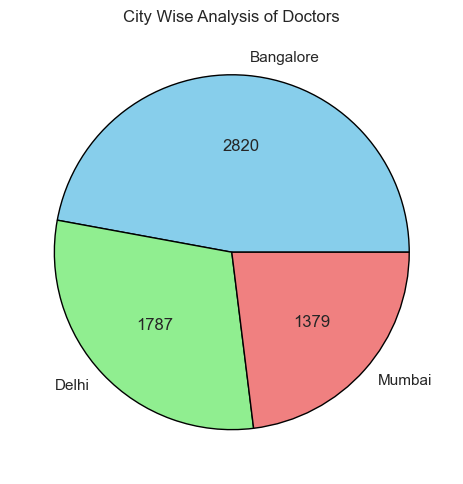

In [277]:
# Create the pie chart
fig, ax = plt.subplots(figsize=(5, 5))
colors = ['skyblue', 'lightgreen', 'lightcoral']

def autopct_format(pct):
    total = sum(doctor_counts)
    value = int(round(pct*total/100.0))
    return f'{value}'

ax.pie(doctor_counts,labels=labels,autopct=autopct_format, labeldistance=1.1,colors=colors,wedgeprops=dict(edgecolor='black'))
ax.set_title('City Wise Analysis of Doctors')

plt.tight_layout()
plt.show()

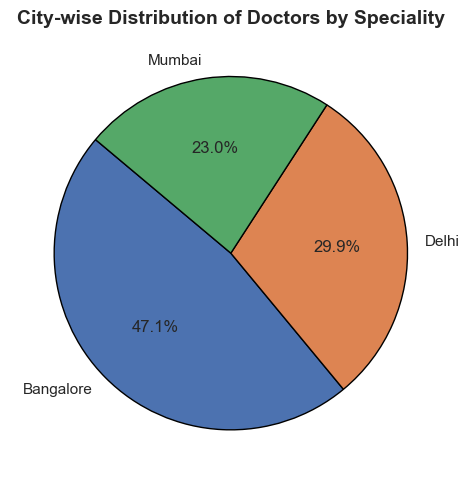

In [295]:
doctor_counts = df2.groupby('City')['Speciality'].count()

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(doctor_counts, labels=doctor_counts.index, autopct='%1.1f%%', startangle=140,wedgeprops=dict(edgecolor='black'))
plt.title('City-wise Distribution of Doctors by Speciality',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Top 5 Most Common Degrees

In [278]:
# display the count of Degree in each city by specialty
df2['Degree'].value_counts().head(5)

MBBS        3362
MDS          873
BDS          712
MD           203
BPTh/BPT     169
Name: Degree, dtype: int64

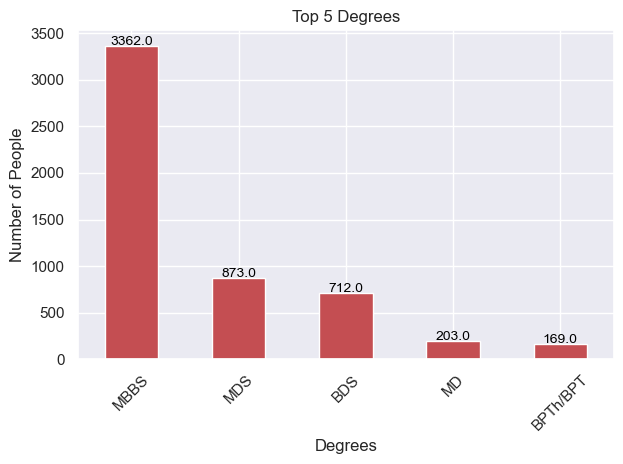

In [279]:
# Create the bar chart
ax=df2['Degree'].value_counts().head(5).plot(kind = 'bar',color='r')
plt.xlabel('Degrees')
plt.ylabel('Number of People')
plt.title('Top 5 Degrees')

plt.xticks(rotation=45)
for container in ax.containers:
    for bar in container:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, f'{yval:.1f}', ha='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()

### Correlation between different variables

/var/folders/18/4mcy45057dsgrqgdvymcp9540000gn/T/ipykernel_48944/2929445766.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(),annot=True)


<Axes: >

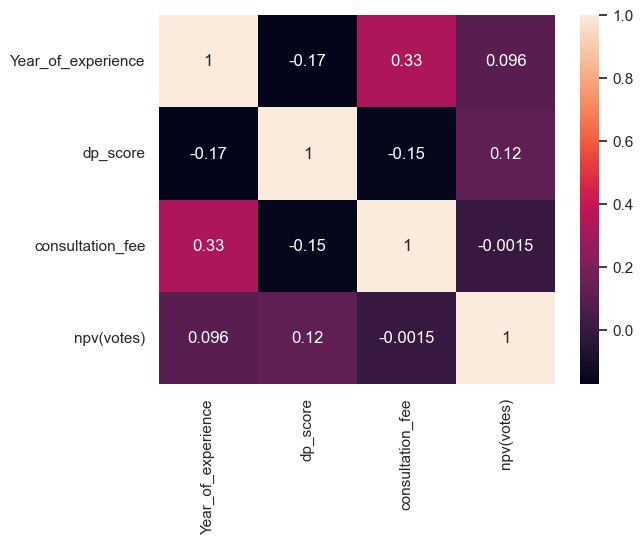

In [280]:
# create a heatmap
sns.heatmap(df2.corr(),annot=True)

### Count of Doctors in different Specialties

In [281]:
# display the count of Speciality in each city by specialty
speciality_count = df2['Speciality'].value_counts()
print(speciality_count)

Dentist                   1601
Gynecologist               834
Pediatrician               473
Orthopedist                461
Infertility Specialist     384
Dermatologist              382
Physiotherapist            302
Ophthalmologist            254
Cardiologist               199
Psychiatrist               170
Urologist                  160
Gastroenterologist         140
Neurosurgeon               136
Dietitian/Nutritionist     132
Neurologist                118
Pulmonologist              100
Bariatric Surgeon           84
Rheumatologist              50
Chiropractor                 6
Name: Speciality, dtype: int64


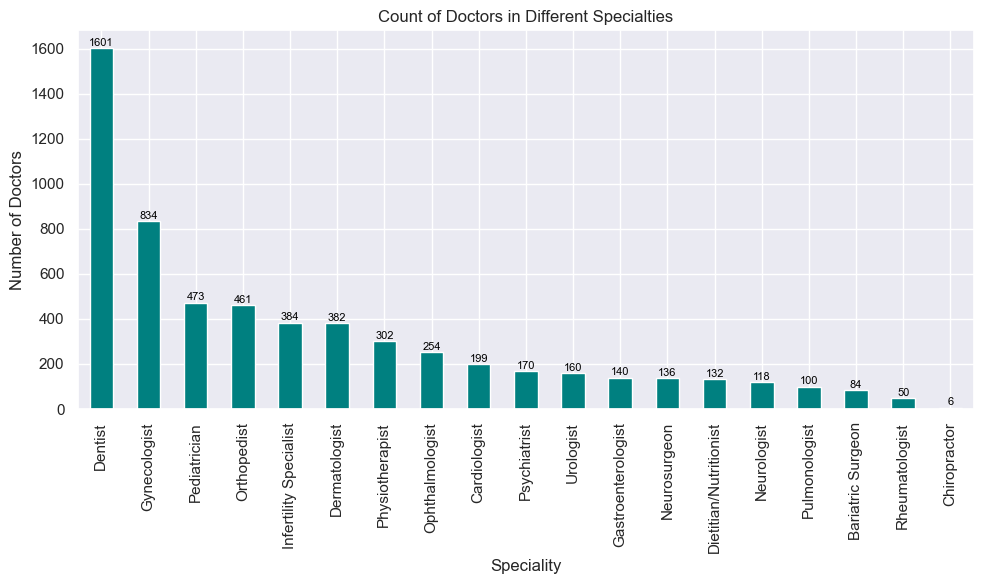

In [282]:
# Create the bar chart
ax = df2['Speciality'].value_counts().plot(kind='bar', color='teal', figsize=(10, 6))

plt.xlabel('Speciality')
plt.ylabel('Number of Doctors')
plt.title('Count of Doctors in Different Specialties')

for container in ax.containers:
    for bar in container:
        yval = int(bar.get_height())  # Convert to integer
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, f'{yval}', ha='center', color='black', fontsize=8)

plt.tight_layout()
plt.show()

### Max and min price

In [283]:
# maximum and minimum consultation fees for each specialty
highest_price = df2.groupby('Speciality')['consultation_fee'].agg(['max','min'])
print(highest_price)

                         max  min
Speciality                       
Bariatric Surgeon       4000  400
Cardiologist            4000  500
Chiropractor            3000  700
Dentist                 2000    0
Dermatologist           3000  300
Dietitian/Nutritionist  4000    0
Gastroenterologist      2500  350
Gynecologist            3000    0
Infertility Specialist  3000    0
Neurologist             4100  500
Neurosurgeon            5000  500
Ophthalmologist         5000  200
Orthopedist             3000  200
Pediatrician            3000  300
Physiotherapist         4000    0
Psychiatrist            3850  700
Pulmonologist           2500  500
Rheumatologist          3000  400
Urologist               4000  450


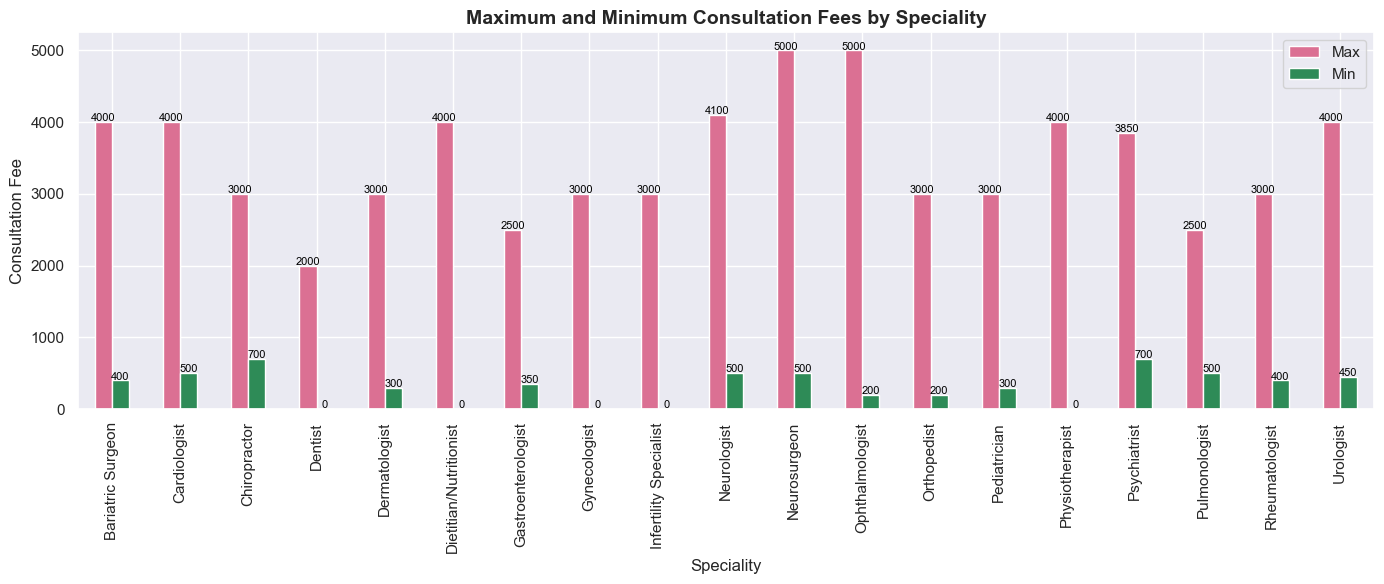

In [294]:
# Create the bar chart
fig, ax = plt.subplots(figsize=(14, 6))  # Decreased height here
highest_price.plot(kind='bar', color=['palevioletred', 'seagreen'], ax=ax)
plt.title('Maximum and Minimum Consultation Fees by Speciality',fontsize=14, fontweight='bold')
plt.xlabel('Speciality')
plt.ylabel('Consultation Fee')

plt.legend(['Max', 'Min'])
for container in ax.containers:
    for bar in container:
        yval = int(bar.get_height())  # Convert to integer
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, f'{yval}', ha='center', color='black', fontsize=8)

plt.tight_layout()
plt.show()

### Average years of experience

In [286]:
# average years of experience for each specialty
avg_exp = df2.groupby('Speciality')['Year_of_experience'].agg('mean')

print(avg_exp)

Speciality
Bariatric Surgeon         24.702381
Cardiologist              24.100503
Chiropractor              11.500000
Dentist                   16.358526
Dermatologist             16.230366
Dietitian/Nutritionist    15.446970
Gastroenterologist        20.671429
Gynecologist              22.890887
Infertility Specialist    22.083333
Neurologist               22.423729
Neurosurgeon              21.029412
Ophthalmologist           20.188976
Orthopedist               21.121475
Pediatrician              22.099366
Physiotherapist           12.069536
Psychiatrist              16.782353
Pulmonologist             19.720000
Rheumatologist            20.880000
Urologist                 21.900000
Name: Year_of_experience, dtype: float64


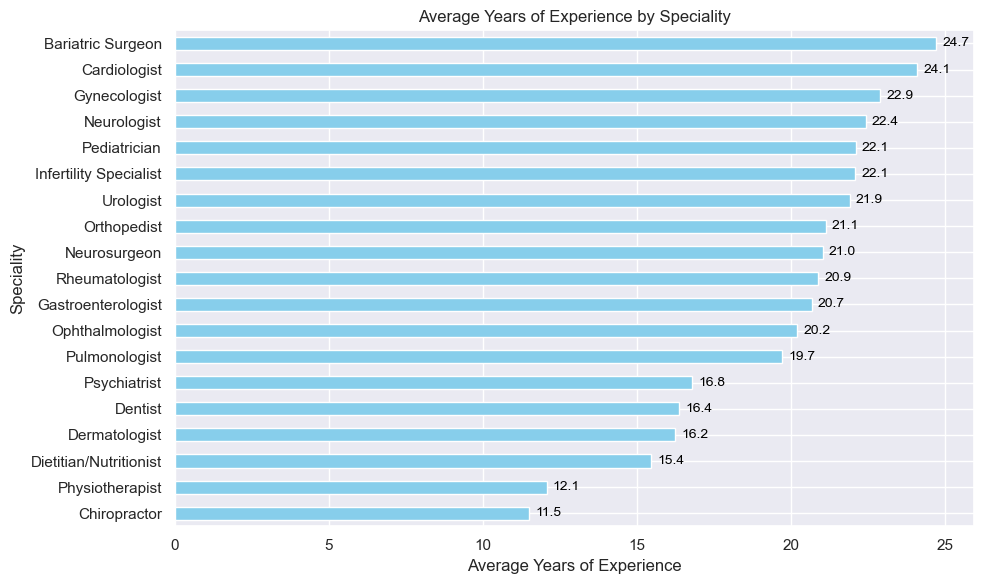

In [287]:
# Create the bar chart
plt.figure(figsize=(10, 6))

bars=avg_exp.sort_values().plot(kind='barh', color='skyblue')
plt.title('Average Years of Experience by Speciality')
plt.xlabel('Average Years of Experience')
plt.ylabel('Speciality')
for bar in bars.patches:
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.1f}',
             va='center', ha='left', color='black', fontsize=10)

plt.tight_layout()
plt.show()